In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,StratifiedKFold


In [3]:
#getting the Data
data = pd.read_csv('../input/train.csv')

In [4]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


**Dealing with Missing data and updating it with Std and most frequent values**
Approach is

    Getting the Data
    Verifying the Catagorical columns and updating the results for missing values with std or Most frequent words
    Verifying the binary columns and updating the results for missing values with std or Most frequent words
    Verifying the continuous columns and updating the results for missing values with std or Most frequent words
    Rescaling the Features within normal range
    fitting the classifier
    Evaluatign and predicting the Clasifier's output
    predicting on Test



In [5]:
#Getting the column information
y = data['target']
X = data.drop(['target','id'],axis= 1)
#Spliting the columns between categories 
catColumns = [col for col in X.columns if '_cat' in col ]
binColumns = [col for col in X.columns if '_bin' in col ]
contiColumns = [col for col in X.columns if ('_bin' not in col) and ('_cat' not in col) ]

column -  ps_car_02_cat has 5 missing values. 0.00%
column -  ps_car_03_cat has 411231 missing values. 69.09%
column -  ps_car_05_cat has 266551 missing values. 44.78%
column -  ps_car_07_cat has 11489 missing values. 1.93%
column -  ps_car_09_cat has 569 missing values. 0.10%


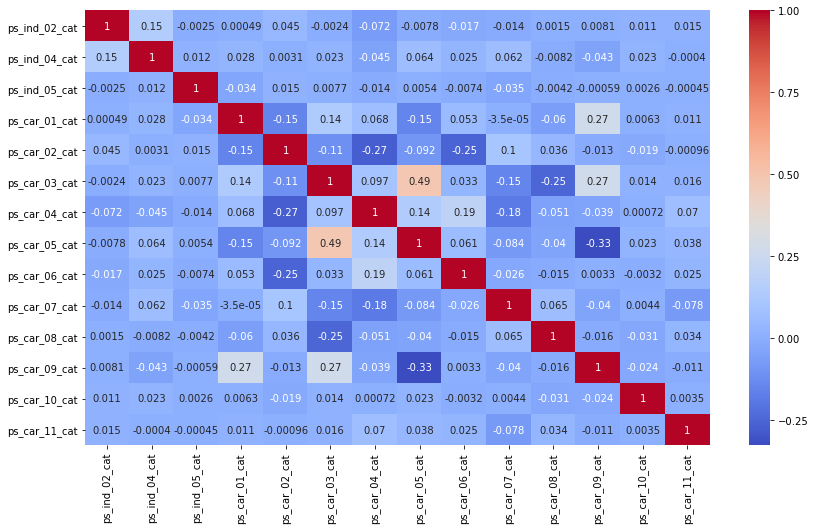

In [9]:
#Evaluating the Categorical colums for missign data
plt.figure(figsize=(14,8))
sns.heatmap(X[catColumns].corr(),annot=True,cmap='coolwarm')

#getting colums with missing value information
for col in catColumns:
    c = X[col][X[col]== -1].count()
    if c > 0:
        print ('column -  {} has {} missing values. {:.2%}'.format(col,c,(c*1.0/len(X[col]))))

'''from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=-1,strategy='most_frequent',axis=0)
'''
for col in catColumns:
    X[col].replace(to_replace = -1, value = X[col].std(), inplace = True)
        
#rechecking for any missing values
for col in catColumns:
    c = X[col][X[col]== -1].count()
    if c > 0 :
        print ('found missing column: {}'.format(col) )

In [11]:
#verifying missing values in Binary columns

for col in binColumns:
    c = X[col][X[col]== -1].count()
    if c > 0:
        print ('column -  {} has {} missing values. {:.2%}'.format(col,c,(c*1.0/len(X[col]))))

column - ps_reg_03 has 107772 missing values. 18.11%
column - ps_car_11 has 5 missing values. 0.00%
column - ps_car_12 has 1 missing values. 0.00%
column - ps_car_14 has 42620 missing values. 7.16%
All Mising values are updated with Std
no Missing columns


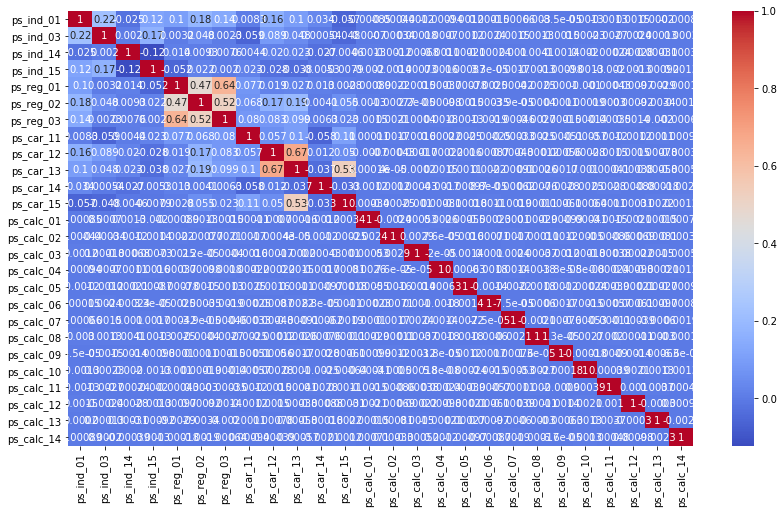

In [13]:
#Evaluating the Continuous colums for missign data
#filling all the missing column data with std

plt.figure(figsize=(14,8))
sns.heatmap(X[contiColumns].corr(),annot=True,cmap='coolwarm')

#getting colums with missing value information
for col in contiColumns:
    c = X[col][X[col]== -1].count()
    if c > 0:
        print ('column - {} has {} missing values. {:.2%}'.format(col,c,(c*1.0/len(X[col]))))
        X[col].replace(to_replace = -1, value = X[col].std(), inplace = True)

print ( 'All Mising values are updated with Std')

'''from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=-1,strategy='most_frequent',axis=1)
'''
for col in catColumns:
    X[col].replace(to_replace = -1, value = X[col].std(), inplace = True)

#rechecking for any missing values
for col in catColumns:
    c = X[col][X[col]== -1].count()
    if c > 0 :
        print ('found missing column: {}'.format(col) )
    
print('no Missing columns')    

In [15]:
#verification of missing value in Dataframe
for col in X.columns:
    c = X[col][X[col]== -1].count()
    if c > 0 :
        print ('found missing column: {}'.format(col)) 
    
print('no Missing columns') 

no Missing columns


In [16]:
X.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1.0,7,0.0,0.0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4.0,9,1.0,0.0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1.0,2,0.0,0.0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2.0,0,1.0,0.0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


**Rescaling the feature withing normal Range**

In [17]:
X = X.apply(lambda x : (x-x.min())/(x.max()-x.min()))

In [18]:
X.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.285714,0.400373,0.454545,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.473684,0.1,0.384615,0.347826,0.0,1.0,1.0,0.0,0.0,1.0
1,0.142857,0.100559,0.636364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.157895,0.1,0.076923,0.391304,0.0,1.0,1.0,0.0,1.0,0.0
2,0.714286,1.000000,0.818182,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.210526,0.2,0.538462,0.304348,0.0,1.0,1.0,0.0,1.0,0.0
3,0.000000,0.100559,0.181818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.105263,0.2,0.307692,0.391304,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.400373,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.157895,0.1,0.076923,0.130435,0.0,0.0,0.0,1.0,1.0,0.0


Fitting the model

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.metrics import auc,roc_auc_score

In [20]:
#setting up the parameter for XGboost
fold = 4
paramCombinations = 4
param = {
    'min_child_weight' : [1,3,8,10,12],
    'gamma': [0.01, 0.5, 1, 1.5, 2, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree' : [0.6, 0.8, 1.0,0.3],
    'max_depth' : [3, 4, 5, 8, 10, 12],
    'learning_rate':[0.1, 0.01, 1, 0.5, 0.75, 0.03, 0.005]
}

In [21]:
skf = StratifiedKFold(random_state=42,shuffle=True,n_splits=fold)
xgb = XGBClassifier(learning_rate=0.03,n_estimators=300,silent=True,nthread=1)

In [25]:
rand_search = RandomizedSearchCV(xgb,param_distributions=param,verbose= 3,scoring= 'roc_auc',random_state=42,n_iter=paramCombinations, cv =skf.split(X,y))

**Training the model **

In [24]:
rand_search.fit(X,y)

ValueError: 'auc' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']